In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

preprocessing.LabelEncoder

Данные о клиентах банка:

* age (возраст);
* job (сфера занятости);
* marital (семейное положение);
* education (уровень образования);
* default (имеется ли просроченный кредит);
* housing (имеется ли кредит на жильё);
* loan (имеется ли кредит на личные нужды);
* balance (баланс).

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

* contact (тип контакта с клиентом);
* month (месяц, в котором был последний контакт);
* day (день, в который был последний контакт);
* duration (продолжительность контакта в секундах).

Прочие признаки:

* campaign (количество контактов с этим клиентом в течение текущей кампании);
* pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
* previous (количество контактов до текущей кампании)
* poutcome (результат прошлой маркетинговой кампании).

In [128]:
df = pd.read_csv('../data/bank_fin.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [130]:
df['balance'].isna().sum()

np.int64(25)

In [131]:
df['job'].describe()

count          11162
unique            12
top       management
freq            2566
Name: job, dtype: object

In [132]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [133]:
df['balance'] = df['balance'].apply(lambda x: str(x).replace('$', '').replace(',', '.').replace(' ', ''))
df['balance'] = np.float64(df['balance'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [134]:
df['balance'].describe()

count    11137.000000
mean      1529.129029
std       3228.114892
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [135]:
m = df['balance'].median()
df['balance'] = df['balance'].fillna(m)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [137]:
df['balance'].describe()

count    11162.000000
mean      1526.936033
std       3224.829691
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1699.000000
max      81204.000000
Name: balance, dtype: float64

In [138]:
df['job'].mode().iloc[0]

'management'

In [139]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [140]:
m = df['job'].mode().iloc[0]
df['job'] = df['job'].apply(
    lambda x: m if x == 'unknown' else x
)
df['job'].value_counts()

job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: count, dtype: int64

In [141]:
df['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [142]:
df['education'].mode().iloc[0]

'secondary'

In [143]:

m = df['education'].mode().iloc[0]
df['education'] = df['education'].apply(
    lambda x: m if x == 'unknown' else x
)
df['education'].value_counts()

education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

In [144]:
df_filtered = df[df['education'] == 'secondary'][df['job'] == 'management']
df_filtered['balance'].describe()

count      376.000000
mean      1598.882979
std       2440.041545
min       -994.000000
25%        171.000000
50%        703.000000
75%       2206.000000
max      19268.000000
Name: balance, dtype: float64

In [145]:
np.percentile(df['balance'], (25, 75))

array([ 123., 1699.])

In [146]:
q1 = np.percentile(df['balance'], 25)
q3 = np.percentile(df['balance'], 75)
iqr = q3 - q1
d1 = q1 - 1.5 * iqr
d3 = q3 + 1.5 * iqr
(d1, d3)

(np.float64(-2241.0), np.float64(4063.0))

In [147]:
df_drop = pd.concat([df[df['balance'] > d3], df[df['balance'] < d1]])
df_drop.shape

(1057, 17)

In [148]:
df.shape[0] - df_drop.shape[0]

10105

In [149]:
df = df[df['balance'] <= d3][df['balance'] >= d1]
df.shape[0]

10105

In [150]:
df['deposit'].value_counts()

deposit
no     5424
yes    4681
Name: count, dtype: int64

In [151]:
df['age'].max()

np.int64(95)

In [152]:
df['duration'].min()

np.int64(2)

In [153]:
df['campaign'].value_counts()

campaign
1     4331
2     2749
3     1192
4      696
5      347
6      239
7      126
8      117
9       64
10      47
11      36
12      28
13      28
14      15
15      13
17      13
16       9
21       7
18       6
24       5
19       5
22       4
30       4
20       4
23       3
25       3
26       3
29       2
43       2
32       2
27       1
41       1
28       1
33       1
31       1
Name: count, dtype: int64

In [154]:
df['campaign'].describe()

count    10105.000000
mean         2.517170
std          2.707159
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         43.000000
Name: campaign, dtype: float64

In [155]:
df['job'].value_counts().shape

(11,)

In [156]:
df['month'].value_counts()

month
may    2617
jul    1418
aug    1385
jun    1104
apr     830
nov     780
feb     709
oct     335
jan     319
sep     278
mar     237
dec      93
Name: count, dtype: int64

In [157]:
df['poutcome'].value_counts()

poutcome
unknown    7570
failure    1109
success     945
other       481
Name: count, dtype: int64

In [158]:
df[df['poutcome'] == 'unknown']['deposit'].value_counts()

deposit
no     4562
yes    3008
Name: count, dtype: int64

In [159]:
df[df['poutcome'] == 'success']['deposit'].value_counts()

deposit
yes    861
no      84
Name: count, dtype: int64

In [160]:
df[df['poutcome'] == 'failure']['deposit'].value_counts()

deposit
no     562
yes    547
Name: count, dtype: int64

In [161]:
df[df['poutcome'] == 'other']['deposit'].value_counts()

deposit
yes    265
no     216
Name: count, dtype: int64

In [162]:
m = df['poutcome'].value_counts()
ret = 0
ret_idx = ''
for i in m.index.to_list():
    substr_series = df[df['poutcome'] == i]['deposit'].value_counts()
    substr = substr_series['yes'] - substr_series['no']
    if substr > ret:
        ret = substr
        ret_idx = i

ret_idx

'success'

In [163]:
m = df['month'].value_counts()
ret = 0
ret_idx = ''
for i in m.index.to_list():
    rate_series = df[df['month'] == i]['deposit'].value_counts()
    rate = rate_series['no']/(rate_series['yes'] + rate_series['no'])
    if rate > ret:
        ret = rate
        ret_idx = i

ret_idx

'may'

In [164]:
df['age_cat'] = df['age'].apply(lambda x: '<30' if x < 30 else '30-40' if x >= 30 and x < 40 else '40-50' if x >= 40 and x < 50 else '50-60' if x >= 50 and x < 60 else '60+')

In [165]:
df['age_cat'].value_counts()

age_cat
30-40    3961
40-50    2382
50-60    1654
<30      1455
60+       653
Name: count, dtype: int64

In [166]:
m = df['age_cat'].value_counts()
ret = {}
for i in m.index.to_list():
    rate_series = df[df['age_cat'] == i]['deposit'].value_counts()
    rate = rate_series['yes']/(rate_series['yes'] + rate_series['no'])
    ret[i] = (rate, rate_series['yes'], rate_series['no'])

ret

{'30-40': (np.float64(0.4332239333501641), np.int64(1716), np.int64(2245)),
 '40-50': (np.float64(0.39378673383711166), np.int64(938), np.int64(1444)),
 '50-60': (np.float64(0.40507859733978235), np.int64(670), np.int64(984)),
 '<30': (np.float64(0.5917525773195876), np.int64(861), np.int64(594)),
 '60+': (np.float64(0.7595712098009189), np.int64(496), np.int64(157))}

<Axes: >

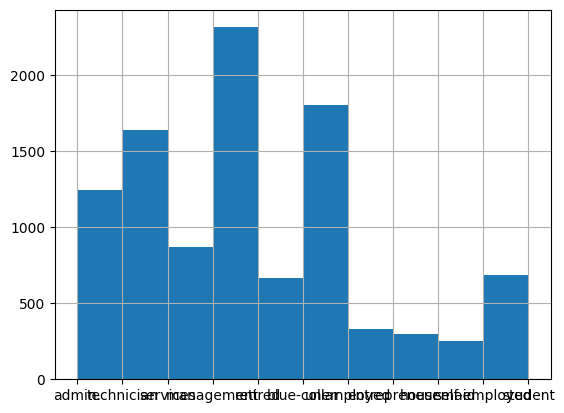

In [167]:
df['job'].hist()

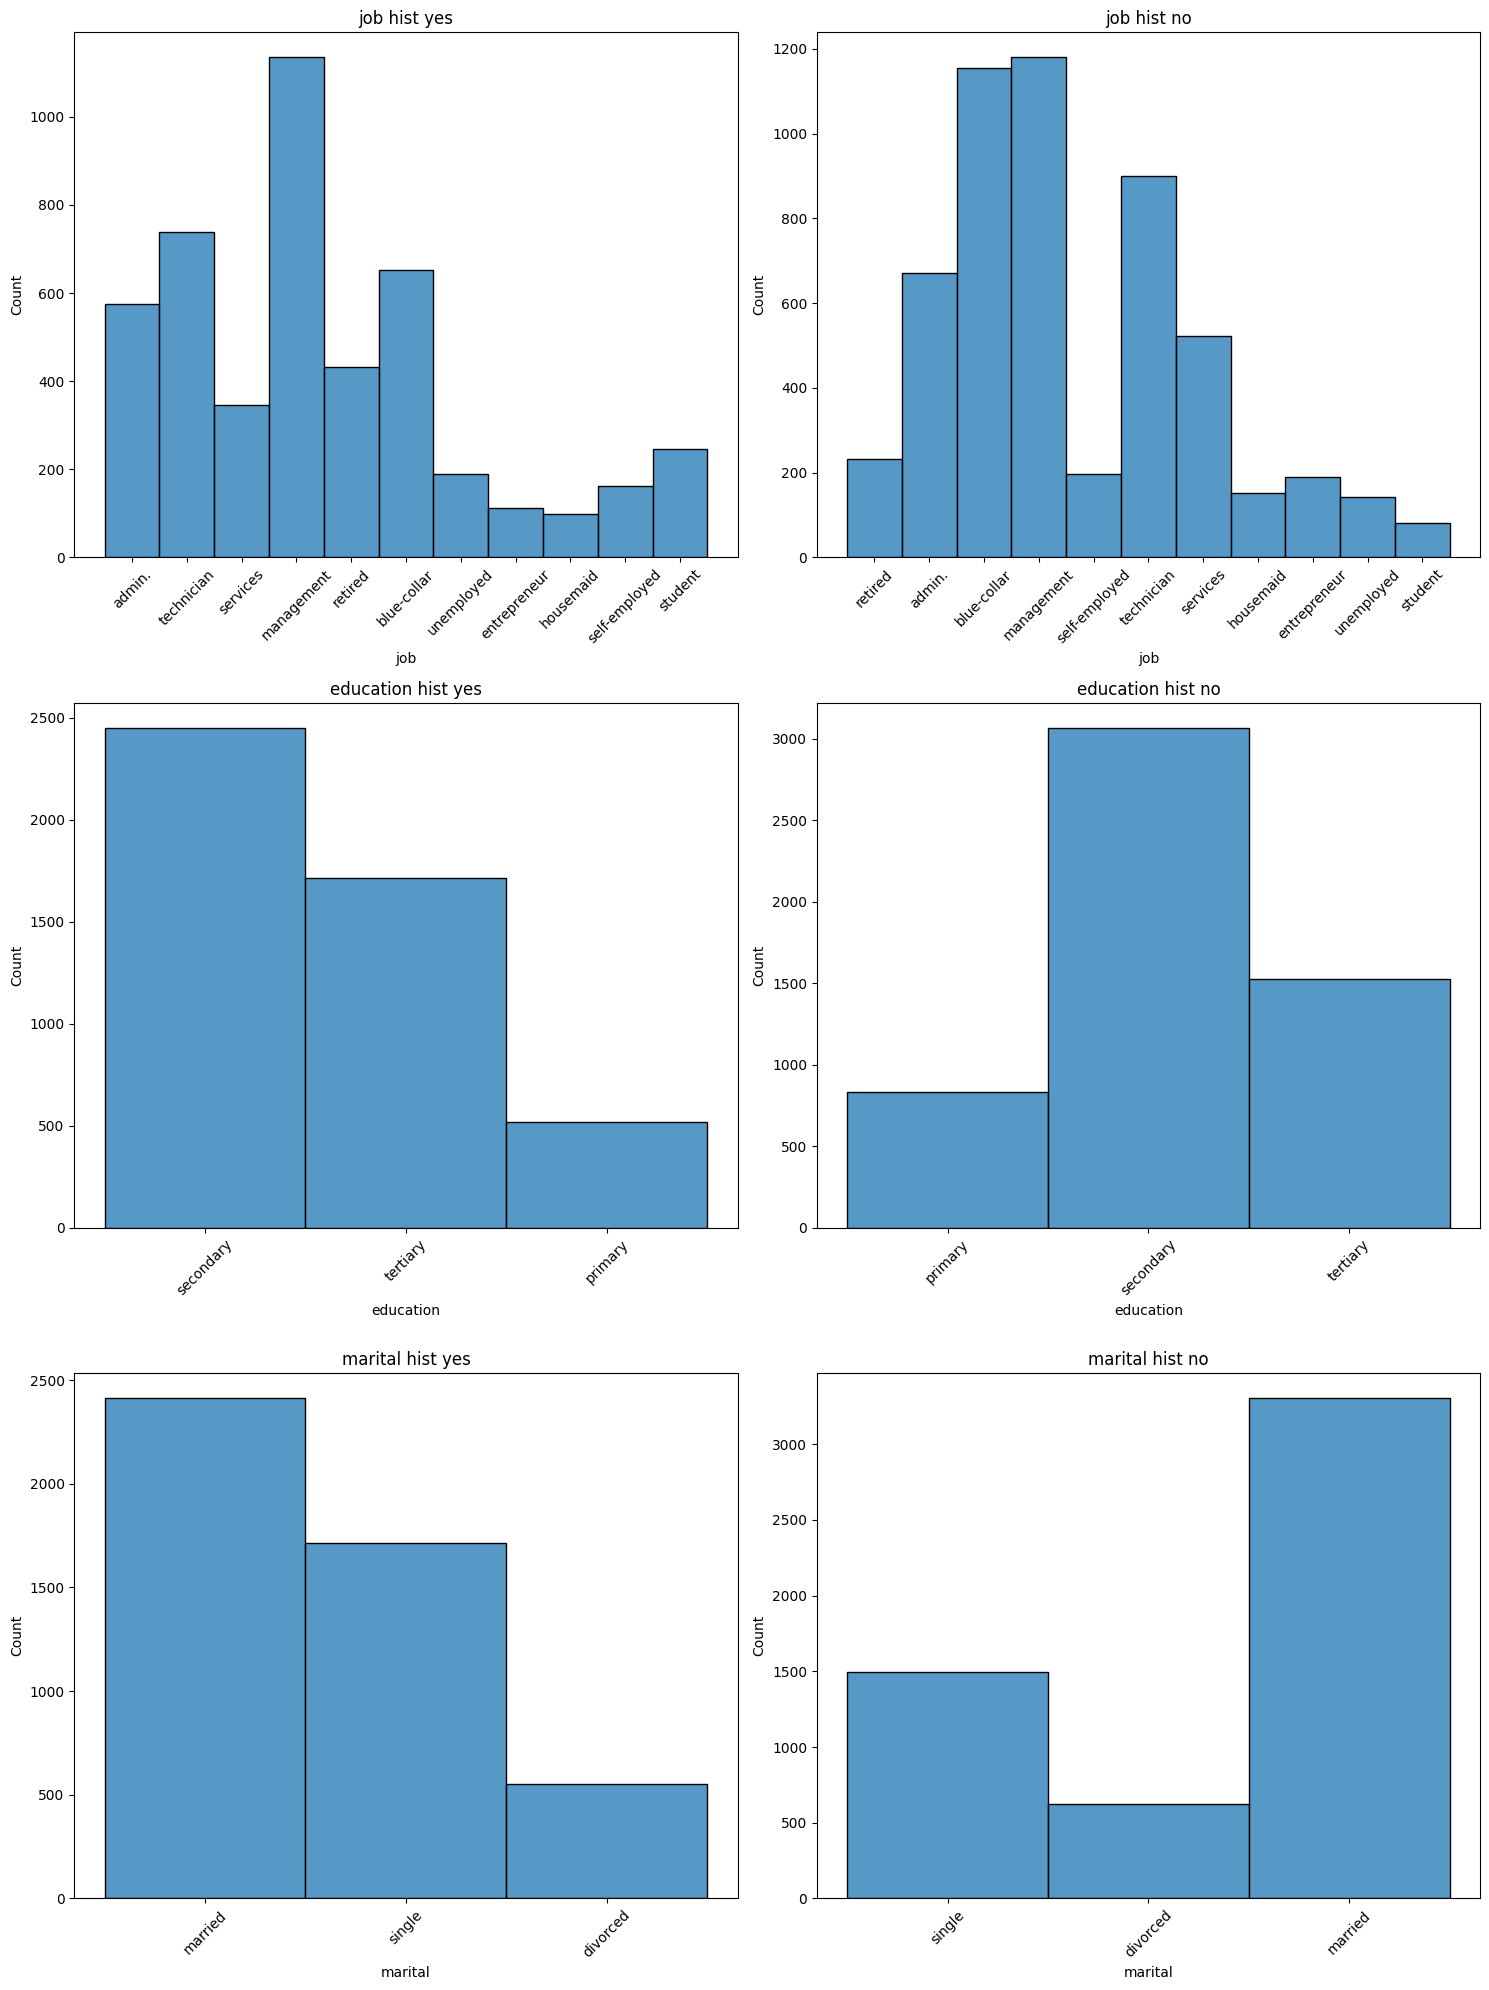

In [168]:
features = ['job', 'education', 'marital']
n = len(features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка 
for i, feature in enumerate(features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=df[df['deposit'] == 'yes'], x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist yes'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    histplot1 = sns.histplot(data=df[df['deposit'] == 'no'], x=feature, ax=axes[i][1])
    #Добавляем подпись графику
    histplot1.set_title('{} hist no'.format(feature));
    #Добавляем поворот отметок на оси абсцисс
    histplot1.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

In [169]:
df_yes = df[df['deposit'] == 'yes']
df_no = df[df['deposit'] == 'no']

In [170]:
pivot_yes = pd.crosstab(df_yes['education'], df_yes['marital'])
pivot_no = pd.crosstab(df_no['education'], df_no['marital'])

In [171]:
pivot_yes

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


In [172]:
pivot_no

marital,divorced,married,single
education,,,
primary,91,641,100
secondary,370,1830,866
tertiary,163,832,531


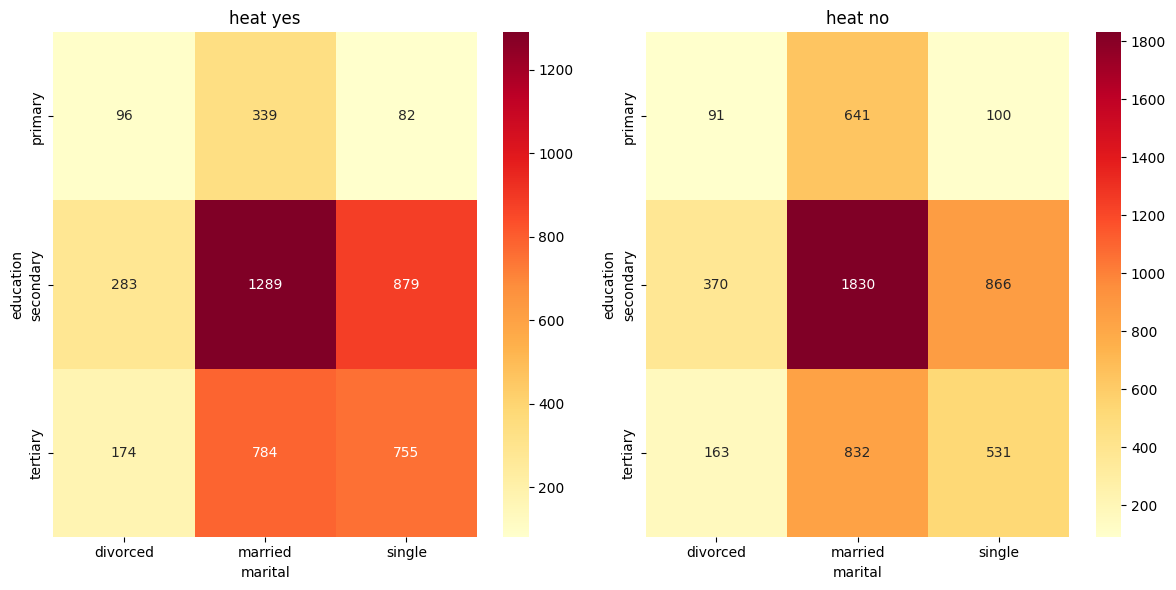

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # 2 координатных плоскостей
heat1 = sns.heatmap(pivot_yes, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0])
heat1.set_title('heat yes')
heat2 = sns.heatmap(pivot_no, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1])
heat2.set_title('heat no')
plt.tight_layout() #выравнивание графиков

In [174]:
label_encoder = LabelEncoder()

df['education'] = label_encoder.fit_transform(df['education'])

df['education'].sum()

np.int64(11995)

In [175]:
df['age_cat'] = label_encoder.fit_transform(df['age_cat'])

In [176]:
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

df['deposit'].describe()

count    10105.000000
mean         0.463236
std          0.498671
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: deposit, dtype: float64

In [177]:
df['default'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

df['default'].describe()[1] + df['housing'].describe()[1] + df['loan'].describe()[1]

np.float64(0.6354280059376547)

In [178]:
df.shape

(10105, 18)

In [203]:
df_new = df.copy()

In [204]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.shape

(10105, 41)

<Axes: >

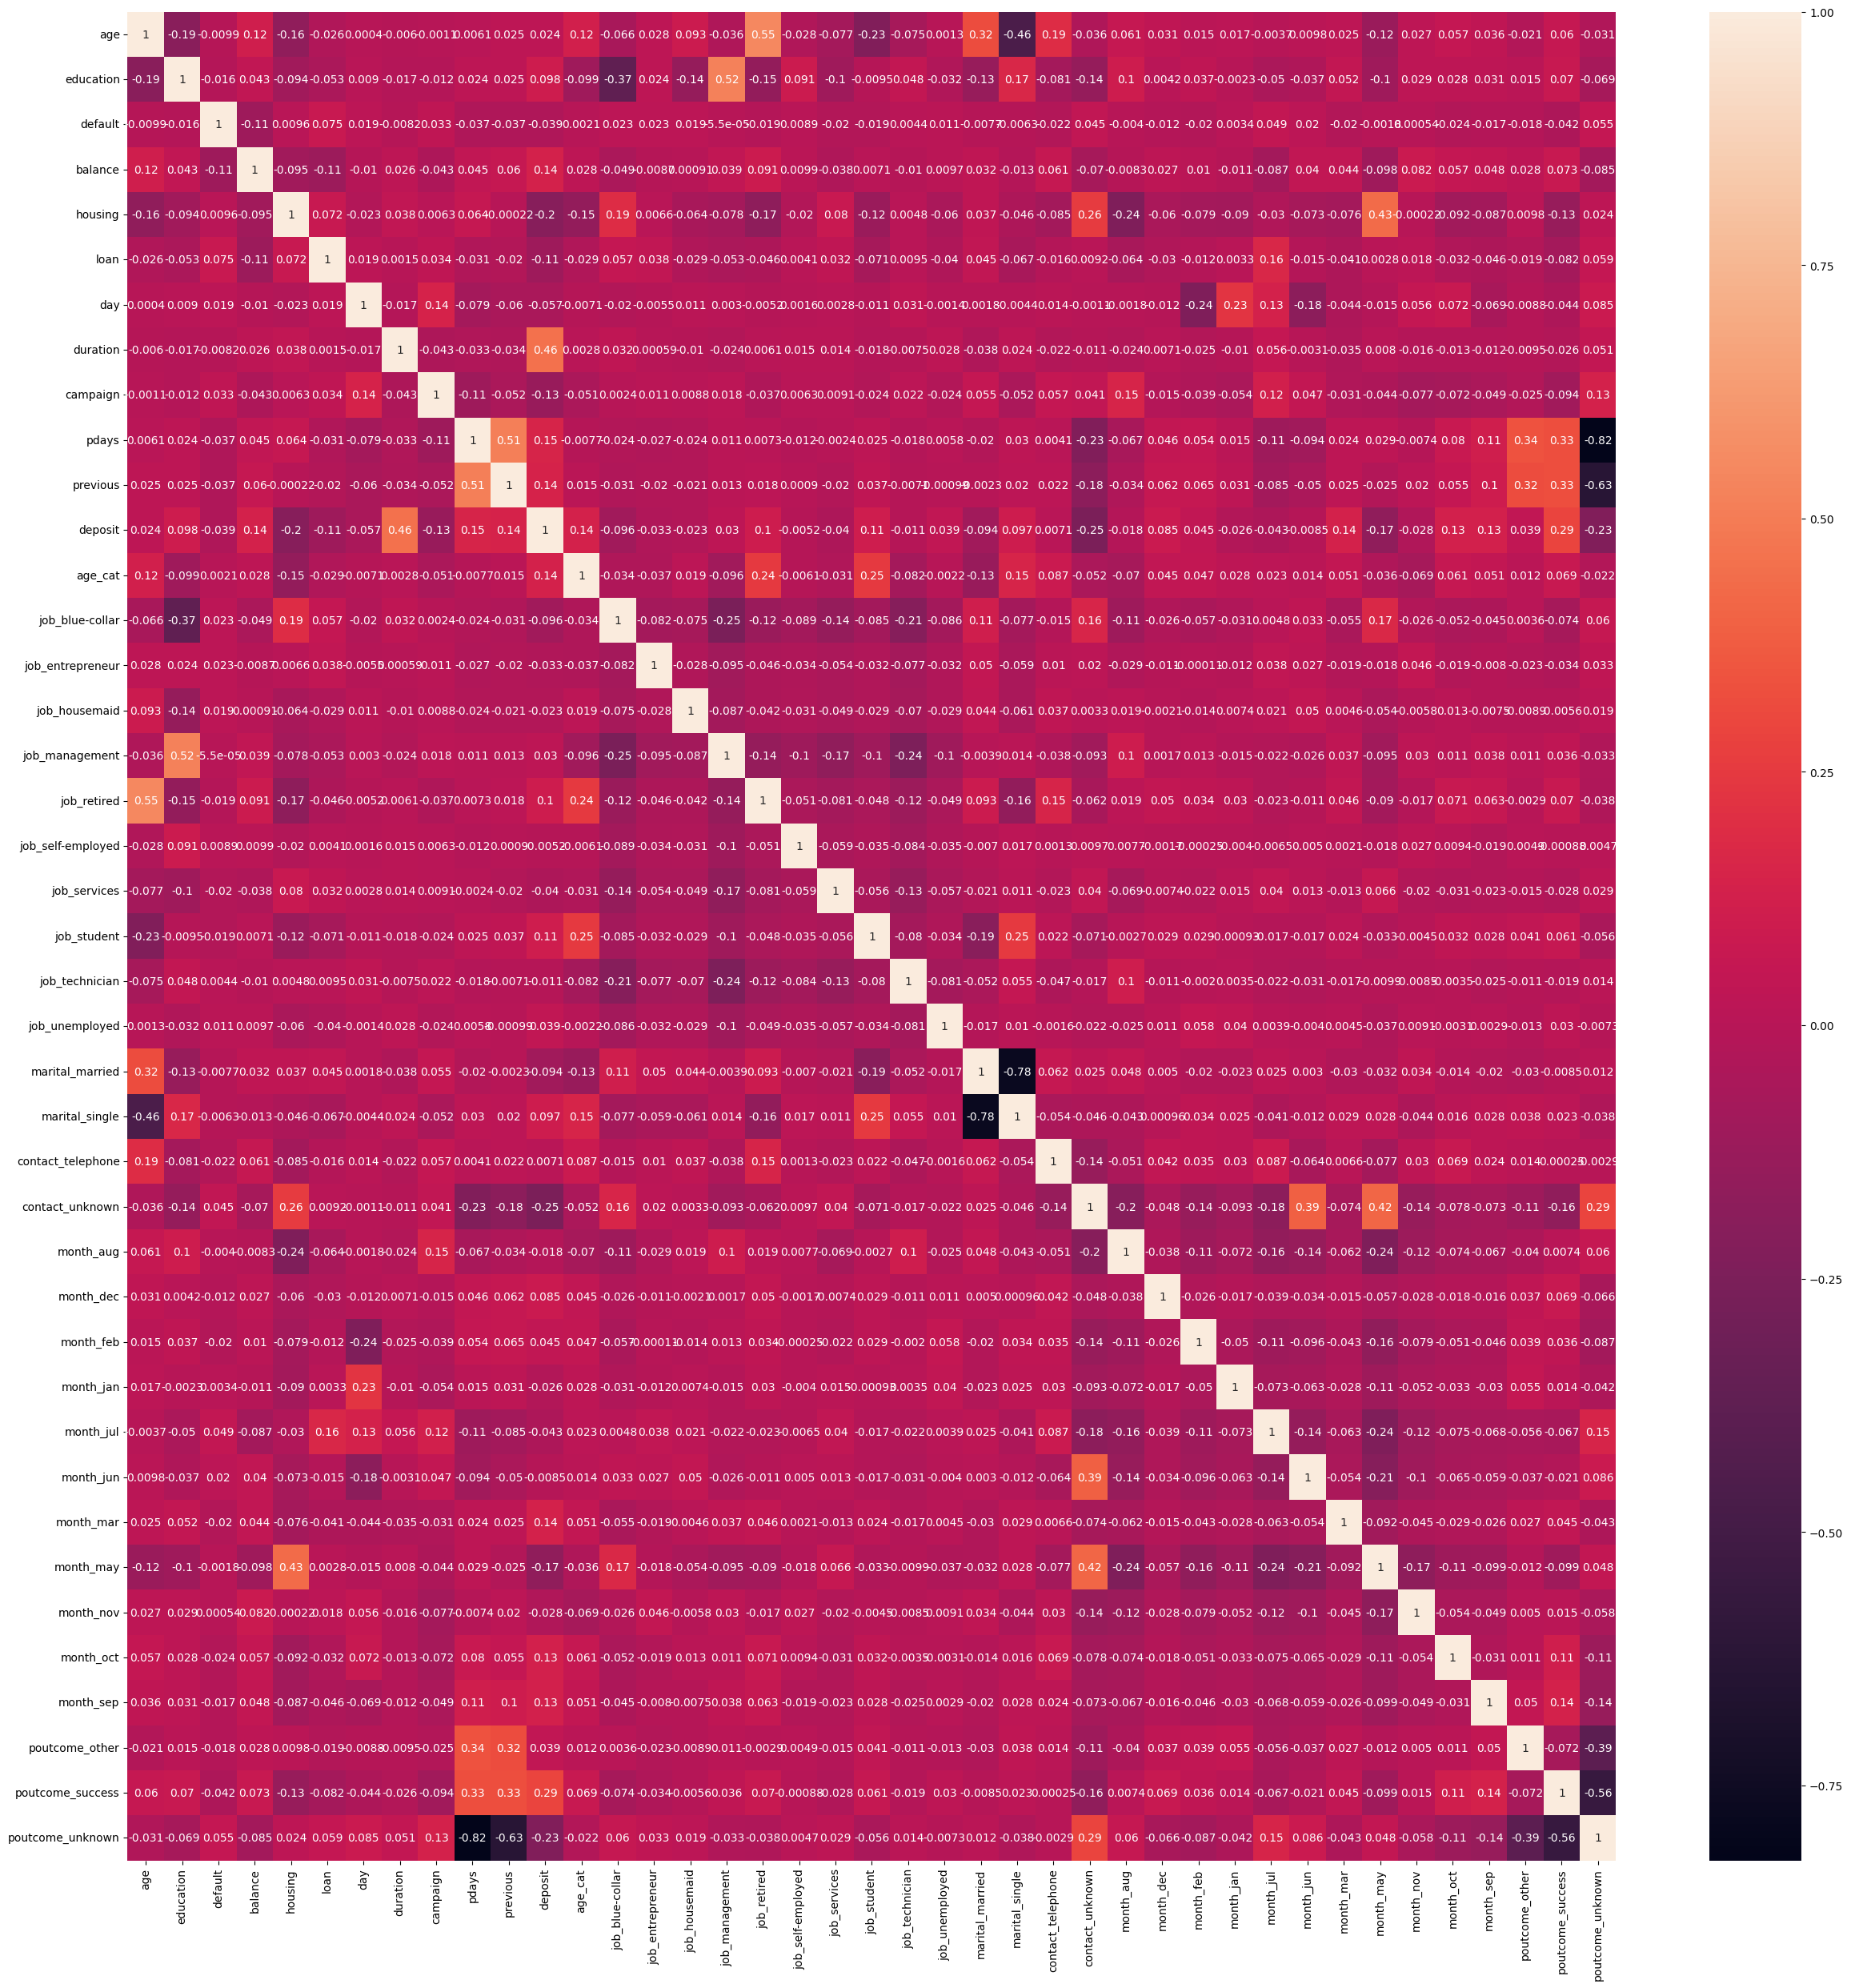

In [205]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(df_new.corr(), annot=True)

In [206]:
X = df_new.drop(['deposit'], axis=1)
y = df_new['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [207]:
X_test.shape

(3335, 40)

In [208]:
y_test.describe()

count    3335.000000
mean        0.463268
std         0.498724
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: deposit, dtype: float64

In [209]:
select_k_best =SelectKBest(k=15, score_func = f_classif)
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_train = X_train[X_train.columns[select_k_best.get_support()]]

In [210]:
X_test = X_test[X_train.columns]

In [211]:
X_train.shape

(6770, 15)

In [212]:
X_train.head()

,balance,housing,loan,duration,campaign,pdays,previous,age_cat,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
7287,557.0,1,0,513,1,-1,0,0,False,False,False,False,False,False,True
4766,69.0,0,1,296,1,205,2,0,False,False,False,False,False,False,False
5712,0.0,1,0,399,2,358,5,0,False,False,True,False,False,False,False
2530,444.0,0,0,137,1,102,5,0,False,False,False,False,False,True,False
9294,1444.0,0,0,100,1,117,8,0,False,False,False,False,False,True,False


In [253]:
scaler = preprocessing.MinMaxScaler()
train_data_scaled = scaler.fit_transform(X_train)
test_data_scaled = scaler.transform(X_test)

In [220]:
test_data_scaled[:, 0].mean()

np.float64(0.46823674223097866)

In [224]:
lr = linear_model.LogisticRegression(solver='sag', random_state=42, max_iter=1000)

lr.fit(train_data_scaled, y_train)

y_pred = lr.predict(test_data_scaled)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335



In [227]:
dtr = tree.DecisionTreeClassifier(
    random_state=42,
    criterion='entropy', max_depth=6)

dtr.fit(train_data_scaled, y_train)
y_train_pred = dtr.predict(train_data_scaled)
y_test_pred = dtr.predict(test_data_scaled)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.78      0.85      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



In [240]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': list(np.linspace(1, 6, 50, dtype=int))}

model = tree.DecisionTreeClassifier(random_state=42, criterion='entropy')
            
grid_search_tree = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_tree.fit(train_data_scaled, y_train) 
y_train_pred = dtr.predict(train_data_scaled)
y_test_pred = dtr.predict(test_data_scaled)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_tree.best_params_))

CPU times: user 218 ms, sys: 187 ms, total: 406 ms
Wall time: 2.84 s
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.78      0.85      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335

Наилучшие значения гиперпараметров: {'max_depth': np.int64(6)}


In [ ]:
param_grid = {'min_samples_leaf': [2, 5, 7, 10],
              'max_depth': [3,5,7]
              }
            
grid_search_tree = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='f1',
    cv=5, 
    n_jobs = -1
)  
%time grid_search_tree.fit(train_data_scaled, y_train) 
y_test_pred = grid_search_tree.predict(test_data_scaled)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_tree.best_params_))

CPU times: user 706 ms, sys: 6.91 ms, total: 713 ms
Wall time: 721 ms
f1_score на тестовом наборе: 0.81
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1790
           1       0.79      0.82      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335

Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_leaf': 10}


In [ ]:
best_model = tree.DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=7, min_samples_leaf = 10)

best_model.fit(train_data_scaled, y_train)
y_train_pred = dtr.predict(train_data_scaled)
y_test_pred = dtr.predict(test_data_scaled)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.80


In [259]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100, 
    criterion='gini', 
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)

rf.fit(train_data_scaled, y_train)

y_pred = rf.predict(train_data_scaled)
y_pred_test = rf.predict(test_data_scaled)

print(metrics.classification_report(y_train, y_pred))
print(metrics.classification_report(y_test, y_pred_test))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.87      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1790
           1       0.80      0.84      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

f1_score на тестовом наборе: 0.82


In [258]:
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05, 
    n_estimators=300, 
    min_samples_leaf=5, 
    max_depth=5, 
    random_state=42 
)

gb.fit(train_data_scaled, y_train)

y_pred = gb.predict(train_data_scaled)
y_pred_test = gb.predict(test_data_scaled)

print(metrics.classification_report(y_train, y_pred))
print(metrics.classification_report(y_test, y_pred_test))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1790
           1       0.81      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

f1_score на тестовом наборе: 0.82


In [ ]:
meta_model = linear_model.LogisticRegression()

stacking_model = ensemble.StackingClassifier(estimators=[
    ('log_reg', lr),
    ('decision_tree', dtr),
    ('random_forest', rf),
    ('grad_boost', gb)
], final_estimator=meta_model)

stacking_model.fit(train_data_scaled, y_train)

y_pred_train = stacking_model.predict(X_train)
y_pred_test = stacking_model.predict(test_data_scaled)

print(metrics.classification_report(y_train, y_pred_train))
print(metrics.classification_report(y_test, y_pred_test))
print(metrics.precision_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3634
           1       0.46      1.00      0.63      3136

    accuracy                           0.46      6770
   macro avg       0.23      0.50      0.32      6770
weighted avg       0.21      0.46      0.29      6770

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1790
           1       0.81      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

0.8064516129032258


In [264]:
importances = gb.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_3_features = feature_importances.head(3)
print("Три самых информативных признака:")
print(top_3_features)

Три самых информативных признака:
             Feature  Importance
3           duration    0.500909
13  poutcome_success    0.116823
8    contact_unknown    0.076874


In [265]:
import optuna

In [266]:
random_state = 42

def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=random_state)
  
  model.fit(train_data_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(train_data_scaled))

  return score

In [267]:
%%time

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")

study.optimize(optuna_rf, n_trials=20)

[I 2025-06-10 22:45:13,229] A new study created in memory with name: RandomForestClassifier
[I 2025-06-10 22:45:13,913] Trial 0 finished with value: 0.8567411341977816 and parameters: {'n_estimators': 148, 'max_depth': 24, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8567411341977816.
[I 2025-06-10 22:45:14,449] Trial 1 finished with value: 0.8927227101631117 and parameters: {'n_estimators': 102, 'max_depth': 19, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8927227101631117.
[I 2025-06-10 22:45:15,081] Trial 2 finished with value: 0.8506716651046548 and parameters: {'n_estimators': 147, 'max_depth': 14, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8927227101631117.
[I 2025-06-10 22:45:15,970] Trial 3 finished with value: 0.866896335734419 and parameters: {'n_estimators': 189, 'max_depth': 12, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8927227101631117.
[I 2025-06-10 22:45:16,472] Trial 4 finished with value: 0.8709375 and parameters: {'n_estimators

CPU times: user 15.2 s, sys: 175 ms, total: 15.4 s
Wall time: 15.7 s


In [268]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 160, 'max_depth': 21, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [276]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=random_state)
model.fit(train_data_scaled, y_train)
y_test_pred = model.predict(test_data_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

f1_score на тестовом наборе: 0.82
0.8296851574212893
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1790
           1       0.80      0.85      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335

